Customer Churn (ou Rotatividade de Clientes, em uma tradução livre) refere-se a uma decisão tomada pelo cliente sobre o término
do relacionamento comercial. Refere-se também à perda de clientes. A fidelidade do cliente e a rotatividade de clientes sempre
somam 100%. Se uma empresa tem uma taxa de fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a
regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da receita. Portanto, é muito importante prever os
usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam as decisões do cliente.
Neste projeto, você deve prever o Customer Churn em uma Operadora de Telecom.

In [1]:
# Import dos primeiros módulos
from pandas import read_csv
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Leitura dos arquivos, o parametro header = 0, é para informar que os dados tem cabeçalho
train = read_csv('teltrain.csv', header = 0)
test = read_csv('teltest.csv', header = 0)

In [3]:
# Verificando os primeiros registros do dataset de treino e teste
train.head(5)

Unnamed: 0 state  account_length      area_code international_plan  \
0           1    KS             128  area_code_415                 no   
1           2    OH             107  area_code_415                 no   
2           3    NJ             137  area_code_415                 no   
3           4    OH              84  area_code_408                yes   
4           5    OK              75  area_code_415                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  ...    total_eve_calls  total_eve_charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churn  
0                              1     no  
1                              1     no  
2                              0     no  
3                              2     no  
4                              3     no  

[5 rows x 21 columns]

In [4]:
# Verificando os primeiros registros do dataset de treino e teste
test.head(5)

Unnamed: 0 state  account_length      area_code international_plan  \
0           1    HI             101  area_code_510                 no   
1           2    MT             137  area_code_510                 no   
2           3    OH             103  area_code_408                 no   
3           4    NM              99  area_code_415                 no   
4           5    SC             108  area_code_415                 no   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0              no                      0               70.9              123   
1              no                      0              223.6               86   
2             yes                     29              294.7               95   
3              no                      0              216.8              123   
4              no                      0              197.4               78   

   total_day_charge  ...    total_eve_calls  total_eve_charge  \
0             12.05  ...                 73             18.01   
1             38.01  ...                139             20.81   
2             50.10  ...                105             20.17   
3             36.86  ...                 88             10.74   
4             33.56  ...                101             10.54   

   total_night_minutes  total_night_calls  total_night_charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls  churn  
0                              3     no  
1                              0     no  
2                              1     no  
3                              1     no  
4                              2     no  

[5 rows x 21 columns]

In [5]:
# Após verificação acima vamos renomear a primeira coluna, pois provavelmente deve ser os clientes, portanto a chamarei
# de ID. Se olharmos o arquivo original em formato csv esta coluna está com o label em branco, lendo aqui pelo notebook
# veio com a descrição de que está sem nome, conforme abaixo.
train = train.rename(columns = {'Unnamed: 0': 'ID'})
test = test.rename(columns = {'Unnamed: 0': 'ID'})

In [6]:
# Verificando a mudança do nome da coluna.  Aqui já podemos notar que a variável a ser prevista que é a (churn)também faz 
# parte do dataset de teste, portanto teremos que tratar mais adiante, antes da criação do modelo.
train.head(5)

ID state  account_length      area_code international_plan voice_mail_plan  \
0   1    KS             128  area_code_415                 no             yes   
1   2    OH             107  area_code_415                 no             yes   
2   3    NJ             137  area_code_415                 no              no   
3   4    OH              84  area_code_408                yes              no   
4   5    OK              75  area_code_415                yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  ...    total_eve_calls  total_eve_charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churn  
0                              1     no  
1                              1     no  
2                              0     no  
3                              2     no  
4                              3     no  

[5 rows x 21 columns]

In [7]:
# Agora irei modificar o dtype da coluna (churn), pois está como object, ou seja, yes/no e vou atribuir 0 para (no) e 1 para(yes)
# Portanto 0 se ainda é cliente e 1 se deixou de ser cliente.
train['churn'] = train['churn'].apply(lambda x: x.replace('no', '0')
                                             .replace('yes', '1'))

test['churn'] = test['churn'].apply(lambda x: x.replace('no', '0')
                                             .replace('yes', '1'))   

In [8]:
# Agora vamos transformar a coluna churn para numeric
train["churn"] = pd.to_numeric(train["churn"],errors = 'coerce')
test["churn"] = pd.to_numeric(test["churn"],errors = 'coerce')

# Aqui abaixo outras formas de conversão para numerico
# train['churn'] = train.churn.astype(int)
# df['churn'] = df['churn'].astype(int)

In [9]:
# Vamos verificar a divisão das classes na variável target. Já podemos ver que claramente estão desbalanceadas e se rodarmos
# um modelo de ML deste jeito, provavelmente nosso modelo será tendencioso, pois os modelos tendem a prever a classe majoritária
train.groupby('churn').size()

churn
0    2850
1     483
dtype: int64

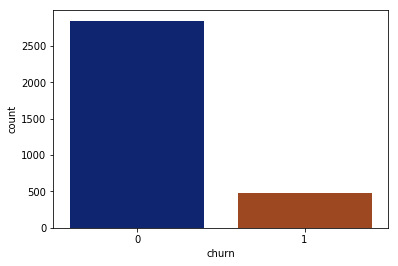

In [10]:
# Verificação da divisão das classes graficamente
sns.countplot(x = 'churn', data = train, palette = 'dark')

In [11]:
# Vamos verificar os nomes das colunas bem como o tipo de objeto de cada coluna. Felizmente todas as linhas contém valores
# é um trabalho a menos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
ID                               3333 non-null int64
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes           

In [12]:
# Verificando se há valores nulos. Podemos verificar que não há valores missing(faltantes). O que já é um trabalho a menos.
train.isnull().sum()

ID                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [13]:
# Baseado nas informações acima e sem conhecimento das variáveis, bem como do negócio de telecomunicações pensei em algumas
# perguntas para que possamos balizar nosso estudo de caso.

# Podemos inferir que clientes com mais pacotes sejam mais fiéis?
# Podemos inferir que quanto maior o tempo de conta, mais fiél é o cliente?
# Podemos inferir que a fidelidade possa se dar em determinado estado e em outros não, talvez dependa da concorrência na região?
# O código de area pode nos dar algum insight?
# O tempo de uso dos serviços pelo cliente é um bom indicador?
# A quantidade de ligações para a central de atendimento ao cliente pode ser uma informação útil?
# O que torna um cliente fiel ou não a uma operadora de telecom? Disponibilidade, ausencia de falhas, atendimento, preço....

In [14]:
# Quando não temos informações sobre as variáveis em um dataset fica bem mais dificil de entender os dados. Neste trecho vamos
# tirar a média de todas as colunas em relação a coluna 'churn'. Observando os dados não dá para inferir muita coisa, por
# exemplo: a média da coluna account_length é praticamente igual para ambas as classes, ou seja, a média do tempo de conta para
# quem deixou de ser cliente é praticamente igual a de quem é cliente. Dá para 'supor que' o tempo de conta não seria uma 
# variável tão importante, mas são só suposições. O que dá para fazer agora é uma soma das colunas que são de serviços oferecidos
# para verificar se clientes que tem mais beneficios tendem a ficar na empresa.
churn = train.groupby('churn')
churn.mean()

ID  account_length  number_vmail_messages  total_day_minutes  \
churn                                                                          
0      1651.064561      100.793684               8.604561         175.175754   
1      1761.028986      102.664596               5.115942         206.914079   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
churn                                                                          
0           100.283158         29.780421         199.043298       100.038596   
1           101.335404         35.175921         212.410145       100.561077   

       total_eve_charge  total_night_minutes  total_night_calls  \
churn                                                             
0             16.918909           200.133193         100.058246   
1             18.054969           205.231677         100.399586   

       total_night_charge  total_intl_minutes  total_intl_calls  \
churn                                                             
0                9.006074           10.158877          4.532982   
1                9.235528           10.700000          4.163561   

       total_intl_charge  number_customer_service_calls  
churn                                                    
0               2.743404                       1.449825  
1               2.889545                       2.229814

In [15]:
# Nota-se acima que as medias em cada variavel são muito parecidas para quem deixou de ser cliente e de quem é cliente. O que 
# chama atençao é a media de ligações feitas para a central de atendimento que é maior nos usuarios que deixaram de ser clientes.

In [16]:
# Resumo Estatistico
train.describe()

ID  account_length  number_vmail_messages  total_day_minutes  \
count  3333.00000     3333.000000            3333.000000        3333.000000   
mean   1667.00000      101.064806               8.099010         179.775098   
std     962.29855       39.822106              13.688365          54.467389   
min       1.00000        1.000000               0.000000           0.000000   
25%     834.00000       74.000000               0.000000         143.700000   
50%    1667.00000      101.000000               0.000000         179.400000   
75%    2500.00000      127.000000              20.000000         216.400000   
max    3333.00000      243.000000              51.000000         350.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls        churn  
count        3333.000000                    3333.000000  3333.000000  
mean            2.764581                       1.562856     0.144914  
std             0.753773                       1.315491     0.352067  
min             0.000000                       0.000000     0.000000  
25%             2.300000                       1.000000     0.000000  
50%             2.780000                       1.000000     0.000000  
75%             3.270000                       2.000000     0.000000  
max             5.400000                       9.000000     1.000000

In [17]:
# Correlação entre as variáveis.
train.corr()

ID  account_length  \
ID                             1.000000        0.036667   
account_length                 0.036667        1.000000   
number_vmail_messages         -0.018086       -0.004628   
total_day_minutes             -0.020769        0.006216   
total_day_calls                0.000272        0.038470   
total_day_charge              -0.020769        0.006214   
total_eve_minutes              0.013872       -0.006757   
total_eve_calls                0.009149        0.019260   
total_eve_charge               0.013875       -0.006745   
total_night_minutes            0.011295       -0.008955   
total_night_calls              0.000995       -0.013176   
total_night_charge             0.011311       -0.008960   
total_intl_minutes             0.005822        0.009514   
total_intl_calls              -0.011221        0.020661   
total_intl_charge              0.005780        0.009546   
number_customer_service_calls  0.009665       -0.003796   
churn                          0.040232        0.016541   

                               number_vmail_messages  total_day_minutes  \
ID                                         -0.018086          -0.020769   
account_length                             -0.004628           0.006216   
number_vmail_messages                       1.000000           0.000778   
total_day_minutes                           0.000778           1.000000   
total_day_calls                            -0.009548           0.006750   
total_day_charge                            0.000776           1.000000   
total_eve_minutes                           0.017562           0.007043   
total_eve_calls                            -0.005864           0.015769   
total_eve_charge                            0.017578           0.007029   
total_night_minutes                         0.007681           0.004323   
total_night_calls                           0.007123           0.022972   
total_night_charge                          0.007663           0.004300   
total_intl_minutes                          0.002856          -0.010155   
total_intl_calls                            0.013957           0.008033   
total_intl_charge                           0.002884          -0.010092   
number_customer_service_calls              -0.013263          -0.013423   
churn                                      -0.089728           0.205151   

                               total_day_calls  total_day_charge  \
ID                                    0.000272         -0.020769   
account_length                        0.038470          0.006214   
number_vmail_messages                -0.009548          0.000776   
total_day_minutes                     0.006750          1.000000   
total_day_calls                       1.000000          0.006753   
total_day_charge                      0.006753          1.000000   
total_eve_minutes                    -0.021451          0.007050   
total_eve_calls                       0.006462          0.015769   
total_eve_charge                     -0.021449          0.007036   
total_night_minutes                   0.022938          0.004324   
total_night_calls                    -0.019557          0.022972   
total_night_charge                    0.022927          0.004301   
total_intl_minutes                    0.021565         -0.010157   
total_intl_calls                      0.004574          0.008032   
total_intl_charge                     0.021666         -0.010094   
number_customer_service_calls        -0.018942         -0.013427   
churn                                 0.018459          0.205151   

                               total_eve_minutes  total_eve_calls  \
ID                                      0.013872         0.009149   
account_length                         -0.006757         0.019260   
number_vmail_messages                   0.017562        -0.005864   
total_day_minutes                       0.007043         0.015769   
total_day_calls                        -0.021451     

In [18]:
# Notar que as maiores correlações com a variavel churn são:
# total day minutes, total_day_charge e number_customer_service_calls

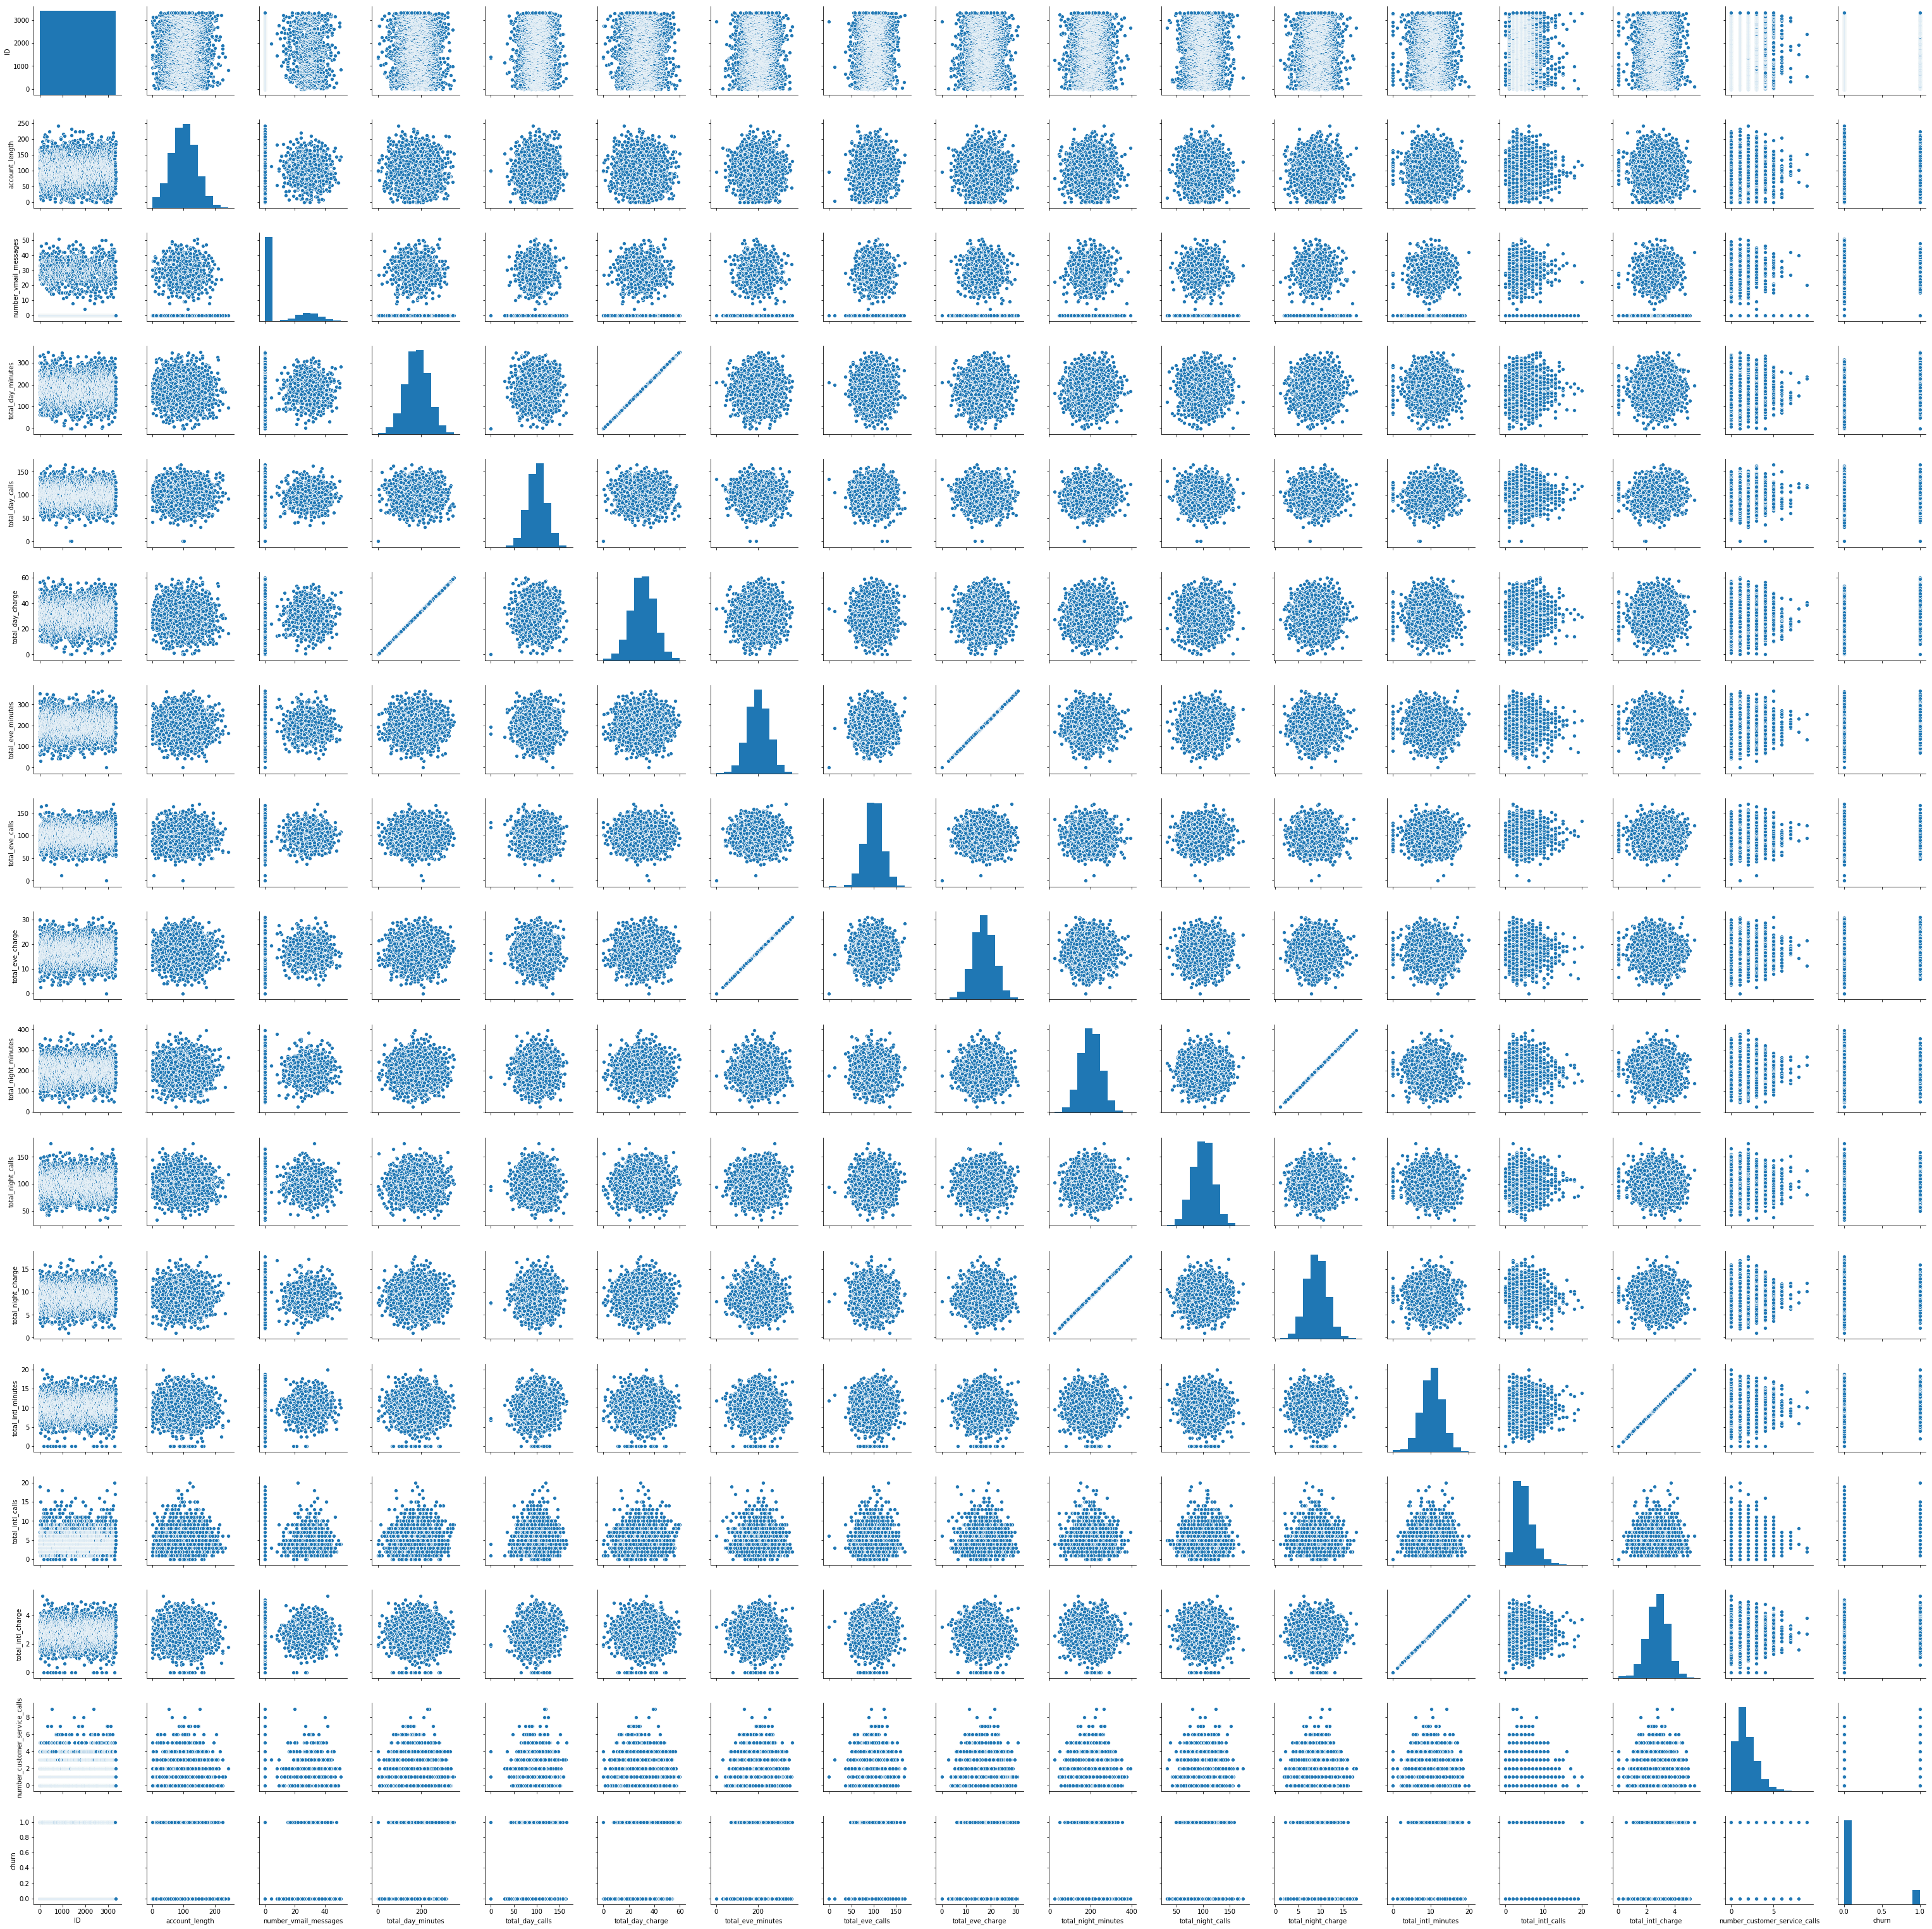

In [19]:
sns.pairplot(train)

In [20]:
# Agora irei somar as colunas: total_day_minutes + total_eve_minutes + total_night_minutes + total_intl_minutes e farei isso 
# também para as colunas de recarga e ligações, afim de verificar se a desistencia ou não de um cliente tem a ver com a 
# quantidade de minutos/recargas etc.

In [21]:
# Criação de 3 novas colunas com a soma das colunas desejadas. Dados de Treino
train['total_minutes'] =  train[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']].sum(axis=1)
train['total_calls'] = train[['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls']].sum(axis = 1)
train['total_charge'] = train[['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']].sum(axis = 1)

In [22]:
# Criação de 3 novas colunas com a soma das colunas desejadas. Dados de Teste
test['total_minutes'] =  test[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']].sum(axis=1)
test['total_calls'] = test[['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls']].sum(axis = 1)
test['total_charge'] = test[['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']].sum(axis = 1)

In [23]:
# Conferindo se as colunas que foram criadas.
train.head()

ID state  account_length      area_code international_plan voice_mail_plan  \
0   1    KS             128  area_code_415                 no             yes   
1   2    OH             107  area_code_415                 no             yes   
2   3    NJ             137  area_code_415                 no              no   
3   4    OH              84  area_code_408                yes              no   
4   5    OK              75  area_code_415                yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge      ...       total_night_calls  total_night_charge  \
0             45.07      ...                      91               11.01   
1             27.47      ...                     103               11.45   
2             41.38      ...                     104                7.32   
3             50.90      ...                      89                8.86   
4             28.34      ...                     121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churn  total_minutes  total_calls  \
0                              1      0          717.2          303   
1                              1      0          625.2          332   
2                              0      0          539.4          333   
3                              2      0          564.8          255   
4                              3      0          512.0          359   

   total_charge  
0         75.56  
1         59.24  
2         62.29  
3         66.80  
4         52.09  

[5 rows x 24 columns]

In [24]:
# Conferindo se as colunas que foram criadas.
test.head()

ID state  account_length      area_code international_plan voice_mail_plan  \
0   1    HI             101  area_code_510                 no              no   
1   2    MT             137  area_code_510                 no              no   
2   3    OH             103  area_code_408                 no             yes   
3   4    NM              99  area_code_415                 no              no   
4   5    SC             108  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0               70.9              123   
1                      0              223.6               86   
2                     29              294.7               95   
3                      0              216.8              123   
4                      0              197.4               78   

   total_day_charge      ...       total_night_calls  total_night_charge  \
0             12.05      ...                      73               10.62   
1             38.01      ...                      81                4.24   
2             50.10      ...                     127               13.51   
3             36.86      ...                      82                9.93   
4             33.56      ...                     107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls  churn  total_minutes  total_calls  \
0                              3      0          529.4          272   
1                              0      0          572.1          313   
2                              1      0          846.0          333   
3                              1      0          579.5          295   
4                              2      0          533.6          290   

   total_charge  
0         43.54  
1         65.63  
2         87.48  
3         61.77  
4         55.38  

[5 rows x 24 columns]

In [25]:
# Através de slicing estou solicitando todas as linhas da coluna churn até a coluna total charge. A coluna churn já existia no 
# dataset e da coluna total_minutes até a coluna total_charge foi as que eu criei.
# Eu armazenei esta parte abaixo em outro objeto pois agora quero dar uma olhada na média pela coluna churn novamente. Fizemos
# isso no dataset original próximo ao incício.
train1 = train.loc[:, 'churn': 'total_charge']
train1.head()

churn  total_minutes  total_calls  total_charge
0      0          717.2          303         75.56
1      0          625.2          332         59.24
2      0          539.4          333         62.29
3      0          564.8          255         66.80
4      0          512.0          359         52.09

In [26]:
# Verificando a media após a soma das colunas. Podemos notar que mesmo após ter somado as colunas que dão uma idéia da 
# movimentação de ligações de cada cliente ainda não dá uma clara idéia de que estas variáveis possam ser tão relevantes
# para que um cliente permaneça ou desista da operadora.
churn1 = train1.groupby('churn')
churn1.mean()

total_minutes  total_calls  total_charge
churn                                          
0         584.511123   304.912982     58.448807
1         635.255901   306.459627     65.355963

In [27]:
# Após fazer a verificação acima, decidi dar uma olhada com mais calma no dataset. Então observei a variável 
# number_customer_service_calls que é a quantidade de ligações feitas para o call center da operadora e aí se colocando no
# lugar do cliente podemos inferir que se eu ligo muito para operadora é porque estou tendo algum problema, ou quero fazer algum
# elogio(o que é raro)ou ainda alguma reclamação. Para mim faz muito sentido analisar esta variável ainda mais se descobrirmos
# que há desistências relacionadas a ligações para  o call center.
# Portanto o código abaixo vai agrupar pela coluna state e fazer uma soma da coluna number_customer e da coluna 
# churn(que é a variável que queremos prever.
# Relembrando que a classe 1 são os clientes que deixaram a operadora, portanto a coluna churn é exatamente a quantidade de 
# clientes que deixaram a operadora por estado.
train.groupby('state')['number_customer_service_calls', 'churn'].sum()

number_customer_service_calls  churn
state                                      
AK                                81      3
AL                               125      8
AR                               109     11
AZ                               102      4
CA                                50      9
CO                               118      9
CT                               112     12
DC                                73      5
DE                                99      9
FL                                99      8
GA                               104      8
HI                                82      3
IA                                70      3
ID                               122      9
IL                                66      5
IN                               120      9
KS                                97     13
KY                               101      8
LA                                80      4
MA                                79     11
MD                               119     17
ME                               108     13
MI                               119     16
MN                               130     15
MO                                98      7
MS                               110     14
MT                               111     14
NC                               106     11
ND                                90      6
NE                                89      5
NH                                85      9
NJ                               114     18
NM                                99      6
NV                               105     14
NY                               142     15
OH                               106     10
OK                               109      9
OR                               135     11
PA                                57      8
RI                                92      6
SC                                95     14
SD                                84      8
TN                                70      5
TX                               116     18
UT                                99     10
VA                               123      5
VT                               127      8
WA                               101     14
WI                               111      7
WV                               159     10
WY                               111      9

In [28]:
# O modo acima não está muito bom de se visualizar, então decidi fazer o mesmo procedimento para a coluna código de area
# Agora de forma mais clara já podemos perceber a quantidade de ligações feitas ao call center por área e já é possível deduzir
# que cerca de 10% dos clientes em cada área deixaram a operadora. Por exemplo: na area 408 foram 1273 ligações e 122 deixaram
# de ser cliente.
# Acredito que esta variável possa ser uma das mais importantes e olhando acima na correlação esta variavel possui uma das 
# maiores correlações com a variável target.
train.groupby('area_code')['number_customer_service_calls', 'churn'].sum()

number_customer_service_calls  churn
area_code                                          
area_code_408                           1273    122
area_code_415                           2572    236
area_code_510                           1364    125

In [29]:
# Para confirmar o que estamos supondo acima irei fazer uma Feature Selection utilizando o XGBoost, no entanto antes temos que
# mudar o type de algumas variáveis, pois não me atentei a isso e quando rodei o modelo gerou o seguinte erro:

# ValueError: DataFrame.dtypes for data must be int, float or bool.
# Did not expect the data types in fields state, area_code, international_plan, voice_mail_plan que quer dizer que estas 
# variáveis não estão com valores numéricos.

In [30]:
# Há algumas formas de se fazer isso tal como a função astype como já fiz para a variável 'churn' acima.
# Mas neste caso para poder aprender outro metódo vamos utilizar o LabelEncoder do pacote SKlearn

In [31]:
# Import do módulo LabelEncoder
from sklearn import preprocessing

In [32]:
le = preprocessing.LabelEncoder()
train['state']=le.fit_transform(train['state'])
train['area_code']=le.fit_transform(train['area_code'])
train['international_plan']=le.fit_transform(train['international_plan'])
train['voice_mail_plan']=le.fit_transform(train['voice_mail_plan'])

In [33]:
le_test = preprocessing.LabelEncoder()
test['state']=le_test.fit_transform(test['state'])
test['area_code']=le_test.fit_transform(test['area_code'])
test['international_plan']=le_test.fit_transform(test['international_plan'])
test['voice_mail_plan']=le_test.fit_transform(test['voice_mail_plan'])

In [34]:
# Vou criar uma coluna chamada Target referenciando a coluna churn. Isso porque quero que a variável a ser prevista
# seja a última do dataframe. 
train["Target"] = train["churn"]
test["Target"] = test["churn"]

In [35]:
# Agora vou excluir a coluna churn que passou a ser a coluna Target
train.drop("churn", axis = 1, inplace = True)
test.drop("churn", axis = 1, inplace = True)

In [36]:
train.head()

ID  state  account_length  area_code  international_plan  voice_mail_plan  \
0   1     16             128          1                   0                1   
1   2     35             107          1                   0                1   
2   3     31             137          1                   0                0   
3   4     35              84          0                   1                0   
4   5     36              75          1                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge   ...    total_night_calls  total_night_charge  \
0             45.07   ...                   91               11.01   
1             27.47   ...                  103               11.45   
2             41.38   ...                  104                7.32   
3             50.90   ...                   89                8.86   
4             28.34   ...                  121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  total_minutes  total_calls  total_charge  \
0                              1          717.2          303         75.56   
1                              1          625.2          332         59.24   
2                              0          539.4          333         62.29   
3                              2          564.8          255         66.80   
4                              3          512.0          359         52.09   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 24 columns]

In [37]:
test.head()

ID  state  account_length  area_code  international_plan  voice_mail_plan  \
0   1     11             101          2                   0                0   
1   2     26             137          2                   0                0   
2   3     35             103          0                   0                1   
3   4     32              99          1                   0                0   
4   5     40             108          1                   0                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0               70.9              123   
1                      0              223.6               86   
2                     29              294.7               95   
3                      0              216.8              123   
4                      0              197.4               78   

   total_day_charge   ...    total_night_calls  total_night_charge  \
0             12.05   ...                   73               10.62   
1             38.01   ...                   81                4.24   
2             50.10   ...                  127               13.51   
3             36.86   ...                   82                9.93   
4             33.56   ...                  107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls  total_minutes  total_calls  total_charge  \
0                              3          529.4          272         43.54   
1                              0          572.1          313         65.63   
2                              1          846.0          333         87.48   
3                              1          579.5          295         61.77   
4                              2          533.6          290         55.38   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 24 columns]

In [38]:
# Vamos verificar se deu certo. Muito bem. Agora temos todas as colunas numericas.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
ID                               3333 non-null int64
state                            3333 non-null int32
account_length                   3333 non-null int64
area_code                        3333 non-null int32
international_plan               3333 non-null int32
voice_mail_plan                  3333 non-null int32
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               

In [39]:
#!pip install xgboost

In [40]:
# Import dos modulos do classificador

from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib as plt

In [41]:
from matplotlib import pyplot as plt

In [42]:
train1 = train

In [43]:
x = train1.iloc[:, 0:22]
y = train1.iloc[:, 23]

In [44]:
best_feature = XGBClassifier()
best_feature.fit(x, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

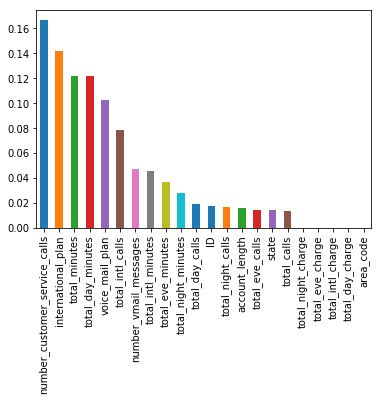

In [45]:
# Este trecho elenca as variáveis com maior importancia em forma gráfica
# Para rodar este trecho é necessário importar o pacote from xgboost import plot_importance
featimport = pd.Series(best_feature.feature_importances_, index = x.columns)
featimport.nlargest(22).plot(kind ='bar') 

In [46]:
# Utilizando o método Ensemble para seleção de variáveis. Cap6 do curso de Big Data Real Time com Python e Spark
# Aqui é gerado um score para cada atributo. Quanto maior o score maior a importancia.

#Import do pacote
from sklearn.ensemble import ExtraTreesClassifier

In [47]:
# Normalmente quando vou testar outros modelos costumo armazenar em outro objeto para não perder o historico
train2 = train1

In [48]:
x = train2.iloc[:, 0:22]
y = train2.iloc[:, 23]

In [49]:
# Criação do Modelo
model_ensemble = ExtraTreesClassifier()
model_ensemble.fit(x, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [50]:
# Impressão dos resultados. Quanto maior o valor maior a importancia.
print(train2.columns[0:22])
print(model_ensemble.feature_importances_)

Index(['ID', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'total_minutes', 'total_calls'],
      dtype='object')
[0.03086448 0.02712122 0.02960809 0.02175195 0.07209394 0.02444767
 0.01725824 0.1198431  0.03169633 0.08324102 0.039528   0.02771919
 0.04802677 0.02897655 0.03190889 0.03155108 0.03134789 0.04172556
 0.04016498 0.10852914 0.08313834 0.02945758]


In [51]:
# Podemos verificar que as variáveis com maior importancia são: total_day_minutes, number_customer_service_calls e total_minutes
# Se observarmos o modelo xgbosst verificamos que estas variáveis também foram selecionadas por este modelo.
# Lembrando que a variavel total_minutes foi criada a partir da soma das variaveis:
# 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'. Por isso a importancia de se analisar
# os dados e se possível criar novas variáveis a partir dos dados desde que seja relevante.

In [52]:
# Para tirar a dúvida, vamos plotar um heatmap para verificar a correlação entre as variáveis. Código retirado do site:
# http://dataskunkworks.com/2018/06/05/predicting-customer-churn-with-python-logistic-regression-decision-trees-and-random-forests/

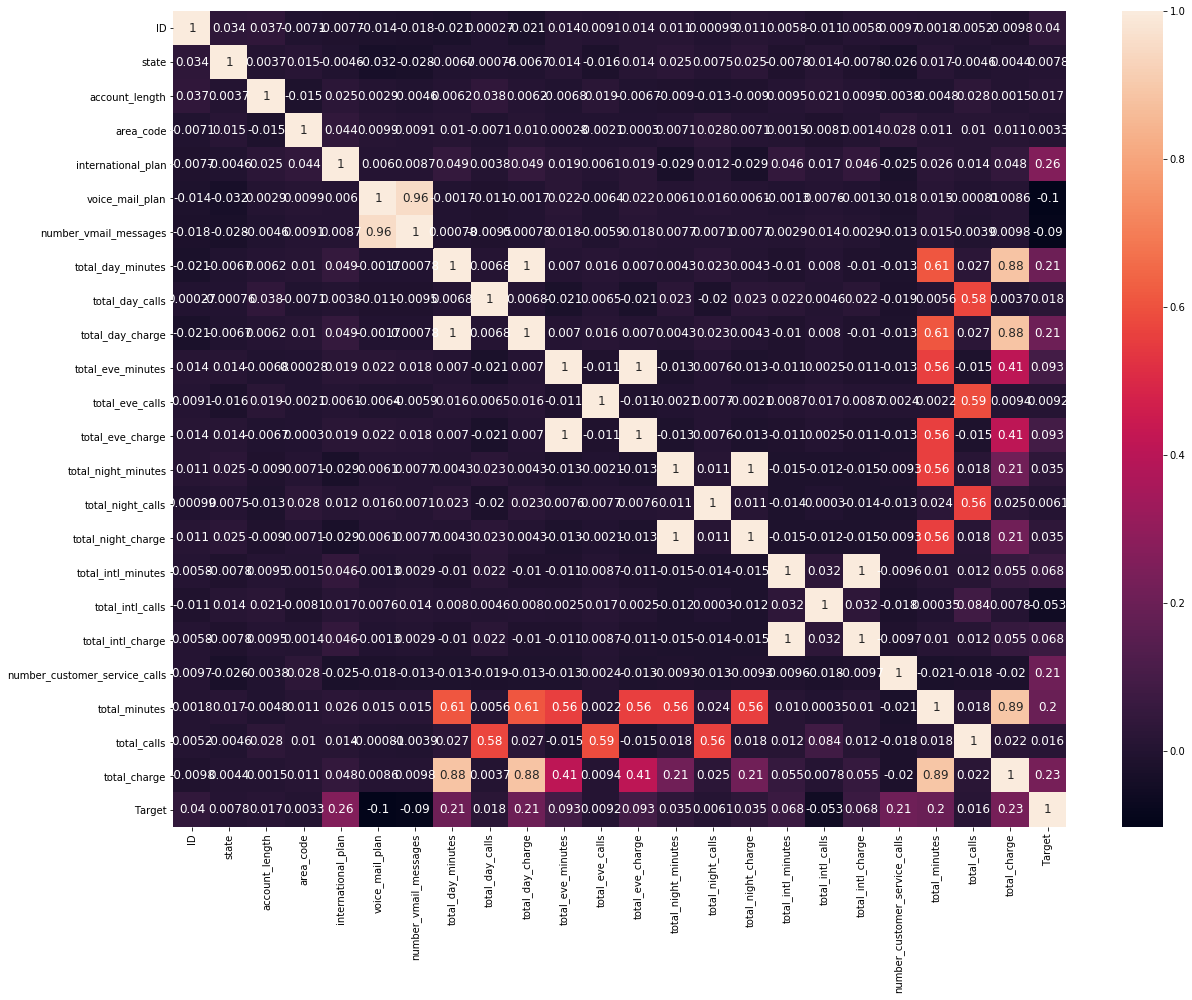

In [53]:
corr = train2.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values,
           annot = True, annot_kws = {'size':12})
heat_map = plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [54]:
# Os dados estão desbalanceados, pois a maior parte dos registros pertencem a classe 0 que são os clientes que 
# permanecem na empresa. Um modelo de ML pode ser tendencioso caso seja rodado com as classes desbalanceadas. Portanto,
# vamos utilizar a técnica abaixo.

In [55]:
### Reamostragem. Uma técnica amplamente adotada para lidar com conjuntos de dados altamente desequilibrados é chamada de
### reamostragem. Consiste em remover amostras da classe majoritária (subamostragem) e / ou adicionar mais exemplos da classe
### minoritária(superamostragem).Que é o caso aqui. Apesar da vantagem de equilibrar as classes, essas técnicas também têm suas
### fraquezas (não há almoço grátis). A implementação mais simples da super amostragem é duplicar registros aleatórios da classe
### minoritária, o que pode causar super ajuste. 
### Na subamostragem, a técnica mais simples envolve a remoção de registros aleatórios da classe majoritária, o que pode causar
### perda de informações. fonte: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [56]:
from sklearn.utils import resample

In [57]:
# Divisão das classes em majoritária e minoritária
t_maj = train2[train.Target == 0]
t_min = train2[train.Target == 1]

In [58]:
# Amostragem da classe minoritária
class_resampled = resample(t_min, 
                                 replace=True,     # amostra com substituição
                                 n_samples=2850,    # parametro para coincidir com a classe majoritaria(tamanho da classe)
                                 random_state=123) # parametro para poder reproduzir o resultado em outro notebook

In [59]:
# União das classes majoritaria e minoritária
class_resampled = pd.concat([t_maj, class_resampled])

In [60]:
# Após o balanceamento percebemos que agora as classes estão na mesma proporção.
class_resampled.Target.value_counts()

1    2850
0    2850
Name: Target, dtype: int64

In [61]:
# Separando os componentes de input e output
dados = train2
array = train2.values
X = array[:, 0:23]
Y = array[:, 23]

In [62]:
# Dados em escala
from sklearn.preprocessing import MinMaxScaler # pacote que faz esta operação

# Split do dataset
X = train2.iloc[:, 0: 23]
y = train2.iloc[:, 23]

# Geração da nova escala
scale = MinMaxScaler(feature_range = (0, 1))
scaled = scale.fit_transform(X)

# Resumo dos dados transformados
print(scaled[0:5,:])# Imprime as primeiras 5 linhas de todas as colunas

[[0.00000000e+00 3.20000000e-01 5.24793388e-01 5.00000000e-01
  0.00000000e+00 1.00000000e+00 4.90196078e-01 7.55701254e-01
  6.66666667e-01 7.55700872e-01 5.42755018e-01 5.82352941e-01
  5.42866386e-01 5.95750403e-01 4.08450704e-01 5.95935445e-01
  5.00000000e-01 1.50000000e-01 5.00000000e-01 1.11111111e-01
  7.20659231e-01 4.97777778e-01 7.18792680e-01]
 [3.00120048e-04 7.00000000e-01 4.38016529e-01 5.00000000e-01
  0.00000000e+00 1.00000000e+00 5.09803922e-01 4.60661345e-01
  7.45454545e-01 4.60596915e-01 5.37530932e-01 6.05882353e-01
  5.37690068e-01 6.21839699e-01 4.92957746e-01 6.22235505e-01
  6.85000000e-01 1.50000000e-01 6.85185185e-01 1.11111111e-01
  5.67504578e-01 6.26666667e-01 4.95902759e-01]
 [6.00240096e-04 6.20000000e-01 5.61983471e-01 5.00000000e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.93842645e-01
  6.90909091e-01 6.93829645e-01 3.33241683e-01 6.47058824e-01
  3.33225493e-01 3.74932760e-01 5.00000000e-01 3.75373580e-01
  6.10000000e-01 2.50000000e-01 6.09

In [63]:
# Divisão dos dados 70% para treino e 30% para teste e rodando o modelo com Logistic Regression

#Import do módulo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # embora tenha este nome é um algoritmo de classificação

dados = train2
array = train2.values

# Definindo o tamanho da amostra
test_size = 0.33
seed = 43

# Criado o conjunto de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = test_size, random_state = seed)

# Criação do Modelo
lr = LogisticRegression()
lr.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = lr.score(X_teste, Y_teste)
print("Accuracy: %.2f%%" % (result * 100.0))

Accuracy: 87.27%


In [64]:
# Utilizando Logistic Regression e Cross Validation. Utilizando kfold = 10.

#Import do módulo
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Definindo os valores para o fold
num_folds = 10
seed = 43

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criação do Modelo
lr = LogisticRegression()

# Score do modelo nos dados de teste            # O proprio cross_val_score faz a separação em treino e teste
result = cross_val_score(lr, X, Y, cv = kfold) # portanto não é necessário o train test split
print("Accuracy: %.2f%%" % (result.mean() * 100.0))# resultado é a media do resultado de cada fold

Accuracy: 85.84%


In [65]:
# Nesta etapa irei gerar uma confusion matrix, pois após gerar os modelos acima percebi que os dados estavam desbalanceados.
# A geração da confusion matrix é para fins de estudo, pois quero ver o comportamento do modelo após o balanceamento.
# Lembro que o que está sendo pedido neste projeto é acurácia do modelo, portanto se os dados estiverem desbalanceados é
# muito provável que nosso modelo esteja tendencioso.

In [66]:
# Confusion Matrix

#Import do módulo
from sklearn.metrics import confusion_matrix

# Definindo os dados de treino e teste
test_size = 0.33
seed = 43
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = test_size, random_state = seed)

# Criação do Modelo
lr = LogisticRegression()
lr.fit(X_treino, Y_treino)

# Fazendo previsões e construindo a Confusion Matrix
prev = lr.predict(X_teste)
matrix = confusion_matrix(Y_teste, prev)

In [67]:
print(matrix)

[[937  24]
 [116  23]]


In [68]:
# Relatorio de Classificação
from sklearn.metrics import classification_report

# Definindo os dados de treino e teste
test_size = 0.33
seed = 43
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = test_size, random_state = seed)

# Criação do Modelo
lr = LogisticRegression()
lr.fit(X_treino, Y_treino)

# Fazendo previsões e construindo a Confusion Matrix
prev = lr.predict(X_teste)
report = classification_report(Y_teste, prev)
print(report)

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       961
         1.0       0.49      0.17      0.25       139

    accuracy                           0.87      1100
   macro avg       0.69      0.57      0.59      1100
weighted avg       0.84      0.87      0.84      1100



##### Precision = Proporção de positivos classificados corretamente, ou seja,dos classificados como  positivos, quantos são positivos realmente.

##### Recall = Proporção de positivos identificados corretamente, ou seja, o quao bom é o modelo para identificar positicos

In [69]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

dados = train2
array = train2.values

# folds
num_folds = 10
seed = 43

kfold = KFold(num_folds, True, random_state = seed)

# Modelo
nb = GaussianNB()

# Cross Validation
result = cross_val_score(nb, X, Y, cv = kfold)

print("Accuracy: %.2f%%" % (result.mean() * 100.0))

Accuracy: 86.95%


In [70]:
# Escolha do modelo

X = array[:, 0:23]
Y = array[:, 23]

# folds
num_folds = 10
seed = 42

# Lista de modelos
modelos = []
modelos.append(("LR", LogisticRegression()))
modelos.append(("NB", GaussianNB()))
modelos.append(("KNN", KNeighborsClassifier()))

# loop dos modelos
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    results = cross_val_score(modelo, X, Y, cv = kfold, scoring = "accuracy")
    resultados.append(results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, results.mean(), results.std())
    print(msg)
    

LR: 0.860171 (0.023948)
NB: 0.870385 (0.017395)
KNN: 0.853570 (0.019955)


In [ ]:
# Portanto o modelo escolhido foi Nayve Bayes com 87% de acurácia.

## FIM